In [44]:
%run ./resources/library.py

<Figure size 432x288 with 0 Axes>

In [45]:
style_notebook()

# Notebook 2: Exploring TB and Socio-economic Indicators

## Goals

Our goal for this TB exploration notebook is to construct a "gapminder" for TB data and a time series choropleth map. See figures below.

![Gapminder for TB](images/gapminder-for-tb.png)

**Figure 1**. Interactive Gapminder bubble chart for TB data

![Choropleth Timeseries for TB](images/choropleth-timeseries-tb.png)

**Figure 2**. Interactive choropleth map for TB data

## Steps

Notebook 2
1. Set up data exploration environment
2. Download and clean up data from the WHO, World Bank

## STEP 1. Set up data exploration environment

To create visualizations, we will use Plotly Express. You can learn more about Plotly Express from:
1. [Plotly GitHub Site](https://github.com/plotly/plotly_express) (GitHub)
2. [Jupyter Notebook Example](https://www.plotly.express/)
3. Some articles written about it [here](https://medium.com/@plotlygraphs/introducing-plotly-express-808df010143d) and [here](https://towardsdatascience.com/plotly-express-the-good-the-bad-and-the-ugly-dc941649687c)

In [46]:
import plotly_express as px
px.__version__

'0.3.1'

We will also use our Swiss Army knife for data science, `pandas`.

In [47]:
import pandas as pd
pd.__version__

'0.24.2'

In [48]:
pd.set_option('max_colwidth', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

**`missingno`**: Missing data visualization module for Python 

Read more about it here: https://github.com/ResidentMario/missingno

In [49]:
import missingno as mno
mno.__version__

'0.4.1'

In [50]:
%matplotlib inline

## STEP 2. Download and clean up data

All data files are found in the `resources` folder. You can also download these using the links and instructions below.

### 1. World Health Organization (WHO), estimates of TB burden

Data from 2000-2017 provided by countries to WHO and estimates of TB burden generated by WHO for the Global Tuberculosis Report. 

1. Source, data: https://extranet.who.int/tme/generateCSV.asp?ds=estimates
2. Source, metadata: https://extranet.who.int/tme/generateCSV.asp?ds=dictionary
3. Instructions: No need to modify CSV download.

**Aggregate Data**

In [51]:
tb_df1 = pd.read_csv("resources/TB_burden_countries_2019-07-03.csv")

tb_df1.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,e_inc_num,e_inc_num_lo,e_inc_num_hi,e_tbhiv_prct,e_tbhiv_prct_lo,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,e_mort_exc_tbhiv_100k,e_mort_exc_tbhiv_100k_lo,e_mort_exc_tbhiv_100k_hi,e_mort_exc_tbhiv_num,e_mort_exc_tbhiv_num_lo,e_mort_exc_tbhiv_num_hi,e_mort_tbhiv_100k,e_mort_tbhiv_100k_lo,e_mort_tbhiv_100k_hi,e_mort_tbhiv_num,e_mort_tbhiv_num_lo,e_mort_tbhiv_num_hi,e_mort_100k,e_mort_100k_lo,e_mort_100k_hi,e_mort_num,e_mort_num_lo,e_mort_num_hi,cfr,cfr_lo,cfr_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20093756,190.0,123.0,271.0,38000,25000,54000,0.36,0.12,0.72,0.68,0.20,1.50,140.0,40.0,290.0,67.0,39.0,103.0,14000,7800.0,21000.0,0.15,0.00,0.77,31,0,160,67.0,39.0,104.0,14000,7800,21000,NaN,NaN,NaN,35.0,19.0,13.0,29.0
1,Afghanistan,AF,AFG,4,EMR,2001,20966463,189.0,123.0,271.0,40000,26000,57000,0.30,0.10,0.61,0.57,0.16,1.20,120.0,34.0,260.0,62.0,36.0,95.0,13000,7500.0,20000.0,0.17,0.00,0.62,35,1,130,62.0,36.0,95.0,13000,7500,20000,NaN,NaN,NaN,48.0,26.0,18.0,39.0
2,Afghanistan,AF,AFG,4,EMR,2002,21979923,189.0,122.0,270.0,42000,27000,59000,0.26,0.09,0.52,0.49,0.15,1.00,110.0,32.0,230.0,56.0,33.0,86.0,12000,7200.0,19000.0,0.27,0.08,0.58,60,17,130,56.0,33.0,86.0,12000,7200,19000,NaN,NaN,NaN,63.0,33.0,23.0,51.0
3,Afghanistan,AF,AFG,4,EMR,2003,23064851,189.0,122.0,270.0,44000,28000,62000,0.23,0.09,0.45,0.44,0.14,0.92,100.0,31.0,210.0,57.0,33.0,87.0,13000,7700.0,20000.0,0.25,0.07,0.52,57,17,120,57.0,33.0,88.0,13000,7700,20000,NaN,NaN,NaN,60.0,32.0,22.0,49.0
4,Afghanistan,AF,AFG,4,EMR,2004,24118979,189.0,122.0,270.0,46000,29000,65000,0.22,0.08,0.42,0.41,0.13,0.85,100.0,32.0,210.0,51.0,30.0,77.0,12000,7100.0,19000.0,0.21,0.07,0.43,50,16,100,51.0,30.0,77.0,12000,7200,19000,NaN,NaN,NaN,76.0,40.0,28.0,62.0


In [52]:
tb_df1.columns

Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'e_pop_num', 'e_inc_100k', 'e_inc_100k_lo', 'e_inc_100k_hi',
       'e_inc_num', 'e_inc_num_lo', 'e_inc_num_hi', 'e_tbhiv_prct',
       'e_tbhiv_prct_lo', 'e_tbhiv_prct_hi', 'e_inc_tbhiv_100k',
       'e_inc_tbhiv_100k_lo', 'e_inc_tbhiv_100k_hi', 'e_inc_tbhiv_num',
       'e_inc_tbhiv_num_lo', 'e_inc_tbhiv_num_hi', 'e_mort_exc_tbhiv_100k',
       'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi',
       'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo',
       'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k', 'e_mort_tbhiv_100k_lo',
       'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo',
       'e_mort_tbhiv_num_hi', 'e_mort_100k', 'e_mort_100k_lo',
       'e_mort_100k_hi', 'e_mort_num', 'e_mort_num_lo', 'e_mort_num_hi', 'cfr',
       'cfr_lo', 'cfr_hi', 'c_newinc_100k', 'c_cdr', 'c_cdr_lo', 'c_cdr_hi'],
      dtype='object')

**Data Dictionary**

You can look up the definitions of the columns above using the data dictionary dataframe.

In [53]:
tb_dict_df = pd.read_csv("resources/TB_data_dictionary_2019-07-03.csv")

tb_dict_df.head()

,variable_name,dataset,code_list,definition
0,budget_cpp_dstb,Budget,NaN,"Average cost of drugs budgeted per patient for drug-susceptible TB treatment, excluding buffer stock (US Dollars)"
1,budget_cpp_mdr,Budget,NaN,"Average cost of drugs budgeted per patient for MDR-TB treatment, excluding buffer stock (US Dollars)"
2,budget_cpp_xdr,Budget,NaN,"Average cost of drugs budgeted per patient for XDR-TB treatment, excluding buffer stock (US Dollars)"
3,budget_fld,Budget,NaN,Budget required for drugs to treat drug-susceptible TB (US Dollars)
4,budget_lab,Budget,NaN,"Budget required for laboratory infrastructure, equipment and supplies (US Dollars)"


You can also query the dataframe for specific variables, as shown below.

In [54]:
tb_dict_df.query("variable_name=='e_mort_num'")

,variable_name,dataset,code_list,definition
103,e_mort_num,Estimates,NaN,Estimated number of deaths from TB (all forms)


In [55]:
tb_dict_df.query("variable_name=='e_inc_100k'")

,variable_name,dataset,code_list,definition
76,e_inc_100k,Estimates,NaN,Estimated incidence (all forms) per 100 000 population


### Prepare for second merge between TB data and the merged WB data

In [56]:
tb_df1.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,e_inc_num,e_inc_num_lo,e_inc_num_hi,e_tbhiv_prct,e_tbhiv_prct_lo,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,e_mort_exc_tbhiv_100k,e_mort_exc_tbhiv_100k_lo,e_mort_exc_tbhiv_100k_hi,e_mort_exc_tbhiv_num,e_mort_exc_tbhiv_num_lo,e_mort_exc_tbhiv_num_hi,e_mort_tbhiv_100k,e_mort_tbhiv_100k_lo,e_mort_tbhiv_100k_hi,e_mort_tbhiv_num,e_mort_tbhiv_num_lo,e_mort_tbhiv_num_hi,e_mort_100k,e_mort_100k_lo,e_mort_100k_hi,e_mort_num,e_mort_num_lo,e_mort_num_hi,cfr,cfr_lo,cfr_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20093756,190.0,123.0,271.0,38000,25000,54000,0.36,0.12,0.72,0.68,0.20,1.50,140.0,40.0,290.0,67.0,39.0,103.0,14000,7800.0,21000.0,0.15,0.00,0.77,31,0,160,67.0,39.0,104.0,14000,7800,21000,NaN,NaN,NaN,35.0,19.0,13.0,29.0
1,Afghanistan,AF,AFG,4,EMR,2001,20966463,189.0,123.0,271.0,40000,26000,57000,0.30,0.10,0.61,0.57,0.16,1.20,120.0,34.0,260.0,62.0,36.0,95.0,13000,7500.0,20000.0,0.17,0.00,0.62,35,1,130,62.0,36.0,95.0,13000,7500,20000,NaN,NaN,NaN,48.0,26.0,18.0,39.0
2,Afghanistan,AF,AFG,4,EMR,2002,21979923,189.0,122.0,270.0,42000,27000,59000,0.26,0.09,0.52,0.49,0.15,1.00,110.0,32.0,230.0,56.0,33.0,86.0,12000,7200.0,19000.0,0.27,0.08,0.58,60,17,130,56.0,33.0,86.0,12000,7200,19000,NaN,NaN,NaN,63.0,33.0,23.0,51.0
3,Afghanistan,AF,AFG,4,EMR,2003,23064851,189.0,122.0,270.0,44000,28000,62000,0.23,0.09,0.45,0.44,0.14,0.92,100.0,31.0,210.0,57.0,33.0,87.0,13000,7700.0,20000.0,0.25,0.07,0.52,57,17,120,57.0,33.0,88.0,13000,7700,20000,NaN,NaN,NaN,60.0,32.0,22.0,49.0
4,Afghanistan,AF,AFG,4,EMR,2004,24118979,189.0,122.0,270.0,46000,29000,65000,0.22,0.08,0.42,0.41,0.13,0.85,100.0,32.0,210.0,51.0,30.0,77.0,12000,7100.0,19000.0,0.21,0.07,0.43,50,16,100,51.0,30.0,77.0,12000,7200,19000,NaN,NaN,NaN,76.0,40.0,28.0,62.0


In [57]:
tb_df2 = tb_df1.rename(columns={'country': 'Country', 'iso3': 'ISO_Alpha', 'year': 'Year'})

tb_df2.head()

,Country,iso2,ISO_Alpha,iso_numeric,g_whoregion,Year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,e_inc_num,e_inc_num_lo,e_inc_num_hi,e_tbhiv_prct,e_tbhiv_prct_lo,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,e_mort_exc_tbhiv_100k,e_mort_exc_tbhiv_100k_lo,e_mort_exc_tbhiv_100k_hi,e_mort_exc_tbhiv_num,e_mort_exc_tbhiv_num_lo,e_mort_exc_tbhiv_num_hi,e_mort_tbhiv_100k,e_mort_tbhiv_100k_lo,e_mort_tbhiv_100k_hi,e_mort_tbhiv_num,e_mort_tbhiv_num_lo,e_mort_tbhiv_num_hi,e_mort_100k,e_mort_100k_lo,e_mort_100k_hi,e_mort_num,e_mort_num_lo,e_mort_num_hi,cfr,cfr_lo,cfr_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20093756,190.0,123.0,271.0,38000,25000,54000,0.36,0.12,0.72,0.68,0.20,1.50,140.0,40.0,290.0,67.0,39.0,103.0,14000,7800.0,21000.0,0.15,0.00,0.77,31,0,160,67.0,39.0,104.0,14000,7800,21000,NaN,NaN,NaN,35.0,19.0,13.0,29.0
1,Afghanistan,AF,AFG,4,EMR,2001,20966463,189.0,123.0,271.0,40000,26000,57000,0.30,0.10,0.61,0.57,0.16,1.20,120.0,34.0,260.0,62.0,36.0,95.0,13000,7500.0,20000.0,0.17,0.00,0.62,35,1,130,62.0,36.0,95.0,13000,7500,20000,NaN,NaN,NaN,48.0,26.0,18.0,39.0
2,Afghanistan,AF,AFG,4,EMR,2002,21979923,189.0,122.0,270.0,42000,27000,59000,0.26,0.09,0.52,0.49,0.15,1.00,110.0,32.0,230.0,56.0,33.0,86.0,12000,7200.0,19000.0,0.27,0.08,0.58,60,17,130,56.0,33.0,86.0,12000,7200,19000,NaN,NaN,NaN,63.0,33.0,23.0,51.0
3,Afghanistan,AF,AFG,4,EMR,2003,23064851,189.0,122.0,270.0,44000,28000,62000,0.23,0.09,0.45,0.44,0.14,0.92,100.0,31.0,210.0,57.0,33.0,87.0,13000,7700.0,20000.0,0.25,0.07,0.52,57,17,120,57.0,33.0,88.0,13000,7700,20000,NaN,NaN,NaN,60.0,32.0,22.0,49.0
4,Afghanistan,AF,AFG,4,EMR,2004,24118979,189.0,122.0,270.0,46000,29000,65000,0.22,0.08,0.42,0.41,0.13,0.85,100.0,32.0,210.0,51.0,30.0,77.0,12000,7100.0,19000.0,0.21,0.07,0.43,50,16,100,51.0,30.0,77.0,12000,7200,19000,NaN,NaN,NaN,76.0,40.0,28.0,62.0


### Pickle WHO TB data set

In [58]:
tb_df2.to_pickle('outputs/tb_df2.pickle')
tb_dict_df.to_pickle('outputs/tb_dict_df.pickle')

### 2. World Bank (WB), World Gross Domestic Product (GDP) Data, 1960-2018

1. Source: http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
2. License: https://datacatalog.worldbank.org/public-licenses#cc-by
3. Note: The downloaded zip file has 3 CSV files: data, metadata and indicator metatadata (first two are used here). The data CSV file has 4 rows at the top that should be deleted.

**Aggregate Data, GDP**

In [59]:
wb_gdp_df1 = pd.read_csv("resources/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_123-V2.csv")

wb_gdp_df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16241.046320,16439.356360,16586.068440,17927.749640,19078.343190,19356.203390,20620.700630,20669.031970,20436.887130,20833.761610,22569.974990,23300.039560,24045.272480,25835.132670,27084.703690,24630.453710,23512.602600,24985.993280,24713.698050,25025.099560,25533.569780,25796.380250,25239.600410,25630.266490,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,129.108323,129.329713,156.518939,159.567578,135.317308,143.14465,173.653765,186.510897,197.445508,224.224797,247.354106,275.738198,272.655286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.426495,190.684009,211.381969,242.031379,263.733735,359.693480,364.660465,438.076034,543.303042,591.162347,641.872034,637.165044,613.856333,578.466353,547.228110,556.302138,520.896603
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710.981648,...,328.673295,397.179451,522.643807,514.295223,423.593660,387.784316,556.836318,527.333529,872.494492,982.960899,1255.564045,1902.422346,2599.566464,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,586.416340,750.604449,1009.977668,717.380567,813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,2972.743265,3595.037163,4370.539925,4114.134899,4094.358816,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4124.108543,4532.889198,5253.630064
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3238.556850,3498.173652,4217.173581,5342.16856,6319.739034,7169.101006,7152.375134,7751.370216,9129.706185,11820.849390,12377.411650,...,16234.809010,18461.064860,19017.174590,18353.059720,18894.521500,19261.710500,21936.530100,22228.846490,24741.493570,32776.442270,38503.479610,41282.020120,43747.691850,48582.220880,47785.089270,43338.866760,39736.354060,41100.729940,38392.943900,40626.751630,42300.334130,36039.653500,37224.108920,39134.393370,42029.762740


Let's drop the two columns, `Indicator Name` and `Indicator Code` and rename `Country Name` to `Country` and `Country Code` to `ISO_Alpha`.

In [60]:
cols = [2,3]
wb_gdp_df2 = wb_gdp_df1.drop(wb_gdp_df1.columns[cols],axis=1)
wb_gdp_df3 = wb_gdp_df2.rename(columns={ "Country Name": "Country", \
                                        "Country Code": "ISO_Alpha" })
wb_gdp_df3

,Country,ISO_Alpha,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16241.046320,16439.356360,16586.068440,17927.749640,19078.343190,19356.203390,20620.700630,20669.031970,20436.887130,20833.761610,22569.974990,23300.039560,24045.272480,25835.132670,27084.703690,24630.453710,23512.602600,24985.993280,24713.698050,25025.099560,25533.569780,25796.380250,25239.600410,25630.266490,NaN
1,Afghanistan,AFG,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,129.108323,129.329713,156.518939,159.567578,135.317308,143.144650,173.653765,186.510897,197.445508,224.224797,247.354106,275.738198,272.655286,264.111317,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.426495,190.684009,211.381969,242.031379,263.733735,359.693480,364.660465,438.076034,543.303042,591.162347,641.872034,637.165044,613.856333,578.466353,547.228110,556.302138,520.896603
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710.981648,642.383858,619.961357,...,328.673295,397.179451,522.643807,514.295223,423.593660,387.784316,556.836318,527.333529,872.494492,982.960899,1255.564045,1902.422346,2599.566464,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,586.416340,750.604449,1009.977668,717.380567,813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,2972.743265,3595.037163,4370.539925,4114.134899,4094.358816,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4124.108543,4532.889198,5253.630064
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3238.556850,3498.173652,4217.173581,5342.168560,6319.739034,7169.101006,7152.375134,7751.370216,9129.706185,11820.849390,12377.411650,10372.232830,9610.266308,...,16234.809010,18461.064860,19017.174590,18353.059720,18894.521500,19261.710500,21936.530100,22228.846490,24741.493570,32776.442270,38503.479610,41282.020120,43747.691850,48582.220880,47785.089270,43338.866760,39736.354060,41100.729940,38392.943900,40626.751630,42300.334130,36039.653500,37224.108920,39134.393370,42029.762740
5,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.369330,237.535728,260.347312,293.484093,340.546888,419.559635,774.860012,832.035536,1002.708725,1120.662286,1191.139891,1561.383341,2051.243700,2048.663402,1862.315911,...,1986.811528,2069.987627,2233.191828,2316.393371,2186.749825,2330.191833,2603.872069,2508.212187,2474.779797,2734.318941,3132.327812,3762.767087,4356.152316,4959.915010,6143.170152,5182.363881,5945.678558,6889.091806,7503.174184,7551.282834,7497.726925,6458.702258,6202.690406,6284.737723,6625.507319
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26847.794380,30118.137780,33823.319650,28456.737440,33512.741330,42764.456660,44987.209800,40026.166250,...,25847.926120,27222.035860,28975.022900,29512.663740,26899.601770,28470.837860,33291.419370,31280.784280,31567.473710,33499.093750,36333.249840,39365.335920,41907.405660,41809.516380,44498.934230,32024.181600,33893.303510,39194.676620,40976.499710,42412.630280,43751.838890,38663.383810,38141.846760,40325.382000,43004.948650
7,Argentina,ARG,NaN,NaN,1155.890170,850.304737,1173.238213,1279.113432,1272.802978,1062.543552,1141.080481,1329.058659,1322.590804,1372.374343,1408.865208,2097.022579,2844.863648,2027.337124,1948.224686,2129.708281,2146.364483,2520.921634,2758.835212,2776.321990,2927.897560,...,7483.139682,7408.708238,7721.354543,8213.127200,8289.505729,7774.736203,7708.100996,7208.371567,2593.404150,3349.806124,4277.721351,5109.85

### Pandas `melt`, prepare WB GDP data for merge

Pandas melt normalizes the dataframe to `Year`, `Country` and `value`, the latter representing `GDP` in US dollars.

In [61]:
wb_gdp_df4 = wb_gdp_df3.melt(id_vars=['Country', 'ISO_Alpha'])

wb_gdp_df4.head()

,Country,ISO_Alpha,variable,value
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,59.773194
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


Let's rename `variable` to `Year` and `value` to `GDP-USD`.

In [62]:
wb_gdp_df5 = wb_gdp_df4.rename(columns={'variable': 'Year', 'value': 'GDP-USD'})

wb_gdp_df5.head()

,Country,ISO_Alpha,Year,GDP-USD
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,59.773194
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [63]:
wb_gdp_df5.columns

Index(['Country', 'ISO_Alpha', 'Year', 'GDP-USD'], dtype='object')

In [64]:
wb_gdp_df5.dtypes

Country       object
ISO_Alpha     object
Year          object
GDP-USD      float64
dtype: object

In [65]:
wb_gdp_df5['Year'] = pd.to_numeric(wb_gdp_df5['Year'])

In [66]:
wb_gdp_df5.dtypes

Country       object
ISO_Alpha     object
Year           int64
GDP-USD      float64
dtype: object

In [67]:
wb_gdp_df5_2017 = wb_gdp_df5.query("Year==2017")

wb_gdp_df5_2017.head()

,Country,ISO_Alpha,Year,GDP-USD
15048,Aruba,ABW,2017,25630.266490
15049,Afghanistan,AFG,2017,556.302138
15050,Angola,AGO,2017,4095.812942
15051,Albania,ALB,2017,4532.889198
15052,Andorra,AND,2017,39134.393370


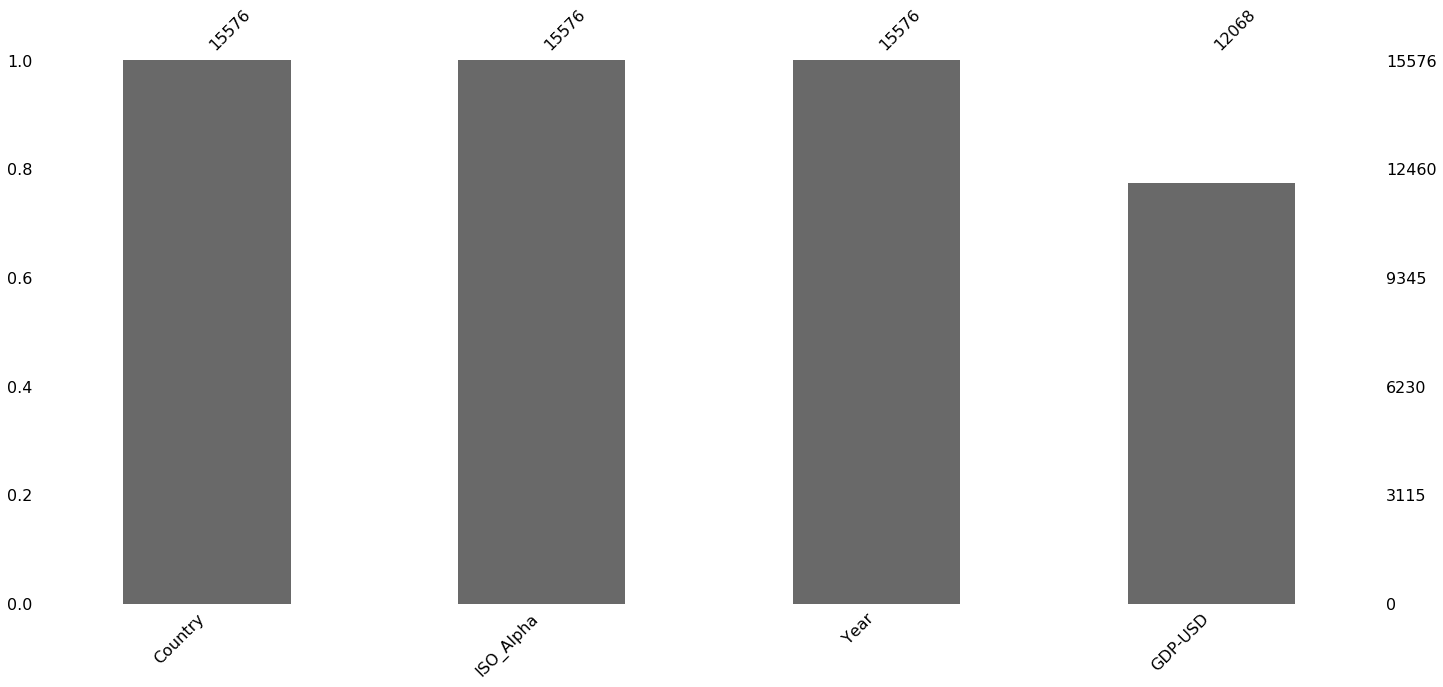

In [68]:
mno.bar(wb_gdp_df5)

### World Bank metadata updates

In [69]:
wb_gdp_meta_df1 = pd.read_csv("resources/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_123.csv")

wb_gdp_meta_df1.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


Let's rename some columns in the WB dataframe above in preparation for dataframe merge.

In [70]:
wb_gdp_meta_df2 = wb_gdp_meta_df1.rename(\
        columns={'TableName': 'Country', 'Country Code': 'ISO_Alpha'})

In [71]:
wb_gdp_meta_df3 = wb_gdp_meta_df2.drop(['Unnamed: 5'], axis=1)

wb_gdp_meta_df3.head()

,ISO_Alpha,Region,IncomeGroup,SpecialNotes,Country
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


### Check linkage column, `ISO_Alpha`, before Merge #1

Because we are going to merge WB data and metadata on the `ISO_Alpha` column, we have to check if they all match.

In [72]:
wb_gdp_iso3 = wb_gdp_df5.ISO_Alpha.unique()
wb_gdp_country = wb_gdp_df5.Country.unique()

wb_gdp_c1 = pd.DataFrame({'ISO_Alpha':wb_gdp_iso3,'Country':wb_gdp_country})

wb_gdp_c1

,ISO_Alpha,Country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,ALB,Albania
4,AND,Andorra
5,ARB,Arab World
6,ARE,United Arab Emirates
7,ARG,Argentina
8,ARM,Armenia
9,ASM,American Samoa


In [73]:
wb_gdp_meta_iso3 = wb_gdp_meta_df3.ISO_Alpha.unique()
wb_gdp_meta_country = wb_gdp_meta_df3.Country.unique()

wb_gdp_c2 = pd.DataFrame({'ISO_Alpha':wb_gdp_meta_iso3,'Country':wb_gdp_meta_country})

wb_gdp_c2

,ISO_Alpha,Country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,ALB,Albania
4,AND,Andorra
5,ARB,Arab World
6,ARE,United Arab Emirates
7,ARG,Argentina
8,ARM,Armenia
9,ASM,American Samoa


Using `numpy` let's check which `Country` names `ISO_Alpha` codes don't match between WB GDP data and metadata.

In [74]:
import numpy as np

wb_nonmatch = np.setdiff1d(wb_gdp_iso3, wb_gdp_meta_iso3)

wb_nonmatch

array(['INX'], dtype=object)

The value `INX` does not represent a country.

### Pickle WB dataframes

In [75]:
wb_gdp_df5.to_pickle('outputs/wb_gdp_df5.pickle')
wb_gdp_meta_df3.to_pickle('outputs/wb_gdp_meta_df3.pickle')

### 3. WB Education Data, 1960-2018

In [76]:
wb_ed_df1 = pd.read_csv('resources/API_4_DS2_en_csv_v2_1804-V2.csv')

wb_ed_df1.head(30)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.669919,54.056784,54.383281,54.710292,55.119933,55.631102,56.075544,56.703126,57.414449,58.086708,58.679715,59.55249,60.248997,60.890062,61.639241,62.566563,63.078929,63.850512,64.825383,65.810270,66.635051,...,69.471969,69.667845,69.450721,69.326281,69.279421,69.261277,69.240421,69.323344,69.421636,69.554820,69.734750,69.935320,69.856791,69.691761,69.448364,69.161089,68.838092,68.882835,68.976476,69.090099,69.165181,69.159774,69.152468,69.003648,68.762184
1,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.847190,43.358346,42.925745,42.488756,41.950133,41.290098,40.689595,39.900095,39.011064,38.134727,37.316086,36.08681,35.015040,33.989011,32.869085,31.577559,30.878421,29.907564,28.734007,27.542514,26.514244,...,23.598435,23.420148,23.562500,23.583106,23.490725,23.348127,23.179202,22.918685,22.622958,22.277539,21.882374,21.473343,21.224413,21.078838,21.002832,20.947631,20.873619,20.533448,20.104897,19.614874,19.130979,18.703098,18.241400,17.911157,17.661588
2,Aruba,ABW,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Unemployment, male (% of male labor force) (modeled ILO estimate)",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Unemployment, female (% of female labor force) (modeled ILO estimate)",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Aruba,ABW,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,"Government expenditure on education, total (% of GDP)",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.763160,4.395540,4.714680,4.739490,4.924270,NaN,4.408900,4.680760,NaN,4.799180,4.915590,5.924670,6.712490,6.036870,6.549060,6.808060,6.162930,6.479060,6.143220,NaN,NaN
8,Aruba,ABW,"Government expenditure on education, total (% of government expenditure)",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aruba,ABW,Expenditure on tertiary education (% of government expenditure on education),SE.XPD.TERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.101950,11.638970,10.584960,12.162330,11.840060,NaN,10.971080,11.485290,NaN,NaN,NaN,NaN,NaN,NaN,20.722980,21.672689,20.021530,25.098330,18.391520,NaN,NaN


In [77]:
wb_ed_df2 = wb_ed_df1.rename(columns={ "Country Name": "Country", \
                                        "Country Code": "ISO_Alpha", \
                                       "Indicator Name": "Indicator_Name", \
                                       "Indicator Code": "Indicator_Code"})
wb_ed_df2.head(30)

,Country,ISO_Alpha,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.669919,54.056784,54.383281,54.710292,55.119933,55.631102,56.075544,56.703126,57.414449,58.086708,58.679715,59.55249,60.248997,60.890062,61.639241,62.566563,63.078929,63.850512,64.825383,65.810270,66.635051,...,69.471969,69.667845,69.450721,69.326281,69.279421,69.261277,69.240421,69.323344,69.421636,69.554820,69.734750,69.935320,69.856791,69.691761,69.448364,69.161089,68.838092,68.882835,68.976476,69.090099,69.165181,69.159774,69.152468,69.003648,68.762184
1,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.847190,43.358346,42.925745,42.488756,41.950133,41.290098,40.689595,39.900095,39.011064,38.134727,37.316086,36.08681,35.015040,33.989011,32.869085,31.577559,30.878421,29.907564,28.734007,27.542514,26.514244,...,23.598435,23.420148,23.562500,23.583106,23.490725,23.348127,23.179202,22.918685,22.622958,22.277539,21.882374,21.473343,21.224413,21.078838,21.002832,20.947631,20.873619,20.533448,20.104897,19.614874,19.130979,18.703098,18.241400,17.911157,17.661588
2,Aruba,ABW,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Unemployment, male (% of male labor force) (modeled ILO estimate)",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Unemployment, female (% of female labor force) (modeled ILO estimate)",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Aruba,ABW,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,"Government expenditure on education, total (% of GDP)",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.763160,4.395540,4.714680,4.739490,4.924270,NaN,4.408900,4.680760,NaN,4.799180,4.915590,5.924670,6.712490,6.036870,6.549060,6.808060,6.162930,6.479060,6.143220,NaN,NaN
8,Aruba,ABW,"Government expenditure on education, total (% of government expenditure)",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aruba,ABW,Expenditure on tertiary education (% of government expenditure on education),SE.XPD.TERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.101950,11.638970,10.584960,12.162330,11.840060,NaN,10.971080,11.485290,NaN,NaN,NaN,NaN,NaN,NaN,20.722980,21.672689,20.021530,25.098330,18.391520,NaN,NaN


In [78]:
wb_ed_df2.to_pickle('outputs/wb_ed_df2.pickle')